In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
from environment.model_apps import apps
from environment.model_infra import Infra
from environment.constants import *

N_APPS = len(apps)
N_INFRA = Infra().getInfraSize()

obs_size = OBSERVATION_SPACE_SIZE
action_size = N_INFRA

In [15]:
data = {}
data["obs"] = [[] for _ in range(N_APPS)]
data["actions"] = [[] for _ in range(N_APPS)]
data["rewards"] = []
with open("data/results.csv", "r") as f:
    for l in f:
        l = l.strip().split(",")
        l = list(map(float, l))
        for app in range(N_APPS):
            data["obs"][app].append(l[obs_size*app:obs_size*(app+1)])
        for app in range(N_APPS):
            data["actions"][app].append(l[obs_size*N_APPS + action_size*app:obs_size*N_APPS + action_size*(app+1)])
        data["rewards"].append(l[-1])

data["obs"] = np.array(data["obs"])
data["actions"] = np.array(data["actions"])
        

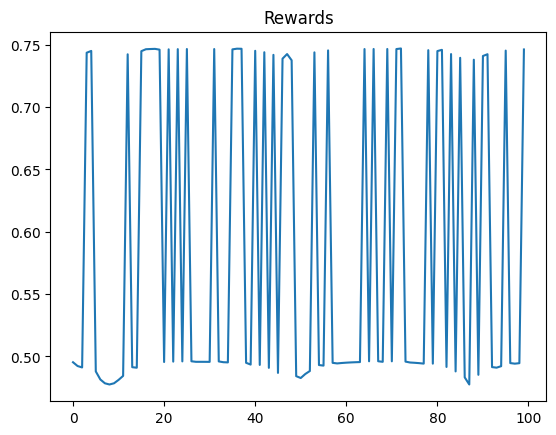

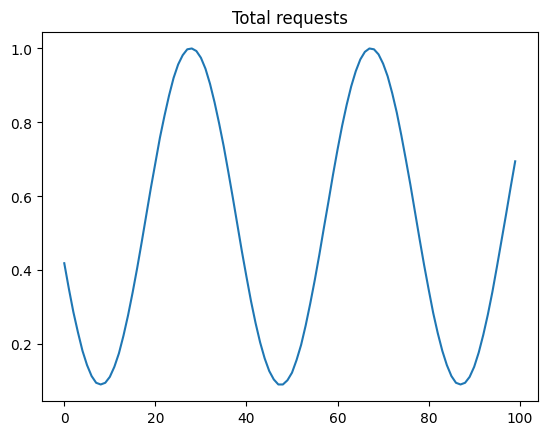

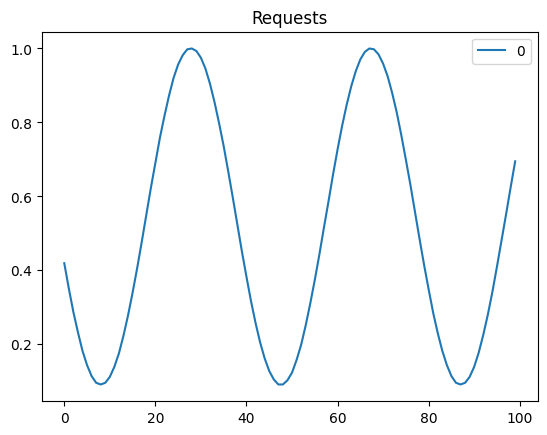

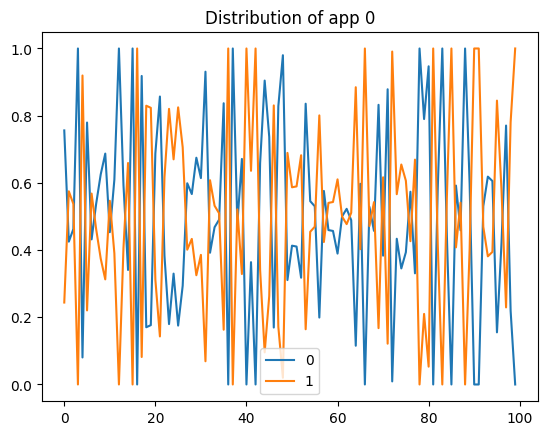

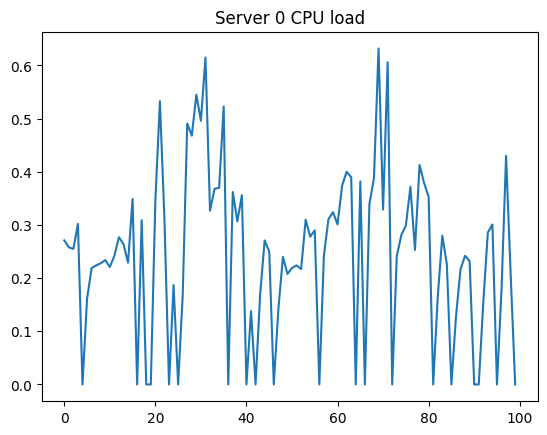

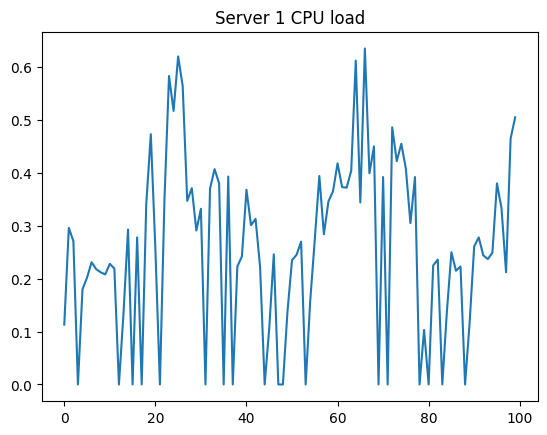

In [16]:
# rewards
plt.figure()
plt.plot(data["rewards"][:100])
plt.title("Rewards")


# requests

plt.figure()
plt.plot(np.sum(data["obs"][:,:100,-1], axis=0))
plt.title("Total requests")

plt.figure()
for app in range(N_APPS):
    plt.plot(data["obs"][app,:100,-1], label=str(app))
plt.legend()
plt.title("Requests")


# actions

for app in range(N_APPS):
    plt.figure()
    for i in range(N_INFRA):
        plt.plot(data["actions"][app,:100,i], label=str(i))
    plt.legend()
    plt.title(f"Distribution of app {app}")


for s in range(N_INFRA):
    plt.figure()
    plt.plot(data["obs"][0,:100,s])
    plt.title(f"Server {s} CPU load")

plt.show()
